In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, preprocessing, model_selection, feature_selection, metrics, decomposition, cluster, pipeline, tree
import seaborn as sns

In [230]:
titanic_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [231]:
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [232]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [233]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [234]:
titanic_df = titanic_df.drop(['PassengerId','Name','Ticket'], axis = 1)
test = test_df.drop(['Name', 'Ticket'], axis =1)

In [235]:
titanic_df["Embarked"] = titanic_df["Embarked"].fillna("S")

c:\users\kapla\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\kapla\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\kapla\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

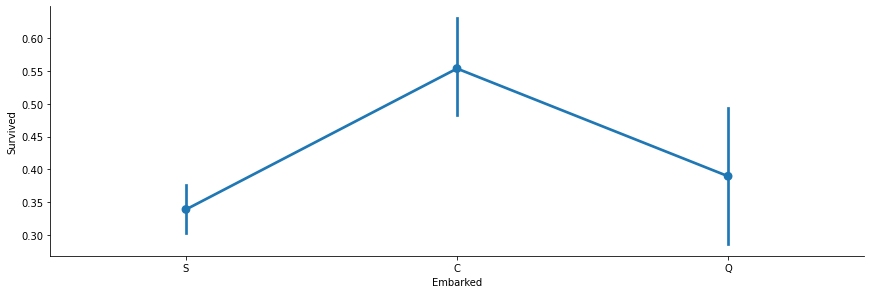

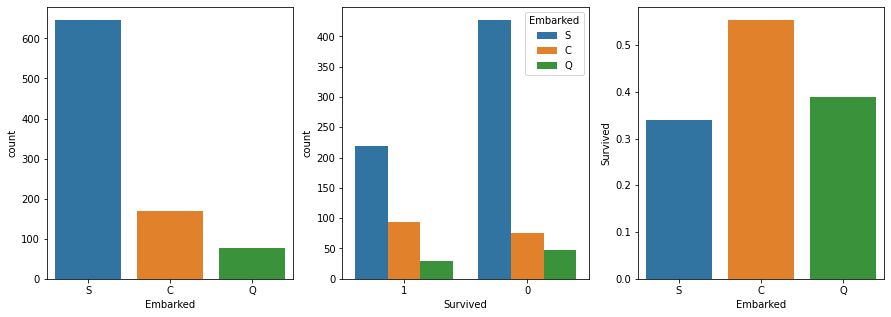

In [236]:
sns.factorplot('Embarked','Survived', data=titanic_df,size=4,aspect=3)

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

sns.countplot(x='Embarked', data=titanic_df, ax=axis1)
sns.countplot(x='Survived', hue="Embarked", data=titanic_df, order=[1,0], ax=axis2)

embark_perc = titanic_df[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_perc,order=['S','C','Q'],ax=axis3)

In [237]:
embark_dummies_titanic  = pd.get_dummies(titanic_df['Embarked'])
embark_dummies_titanic.drop(['S'], axis=1, inplace=True)

embark_dummies_test  = pd.get_dummies(test_df['Embarked'])
embark_dummies_test.drop(['S'], axis=1, inplace=True)

In [238]:
titanic_df = titanic_df.join(embark_dummies_titanic)
test_df    = test_df.join(embark_dummies_test)

titanic_df.drop(['Embarked'], axis=1,inplace=True)
test_df.drop(['Embarked'], axis=1,inplace=True)

In [239]:
from pandas import Series,DataFrame

test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)

titanic_df['Fare'] = titanic_df['Fare'].astype(int)
test_df['Fare']    = test_df['Fare'].astype(int)

fare_survived     = titanic_df["Fare"][titanic_df["Survived"] == 1]
fare_not_survived = titanic_df["Fare"][titanic_df["Survived"] == 0]

avgerage_fare = DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare      = DataFrame([fare_not_survived.std(), fare_survived.std()])

<AxesSubplot:xlabel='Survived'>

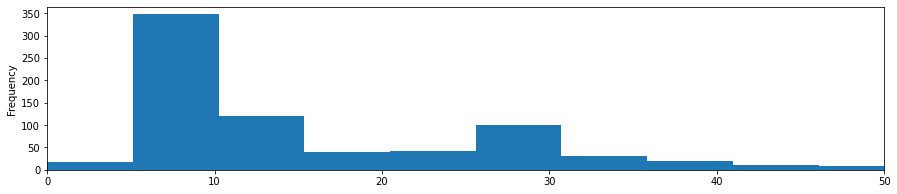

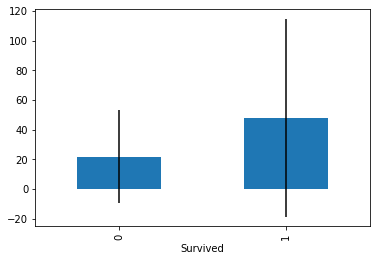

In [240]:
titanic_df['Fare'].plot(kind='hist', figsize=(15,3),bins=100, xlim=(0,50))

avgerage_fare.index.names = std_fare.index.names = ["Survived"]
avgerage_fare.plot(yerr=std_fare,kind='bar',legend=False)

# AGE

c:\users\kapla\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\kapla\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<AxesSubplot:title={'center':'New Age values - Titanic'}>

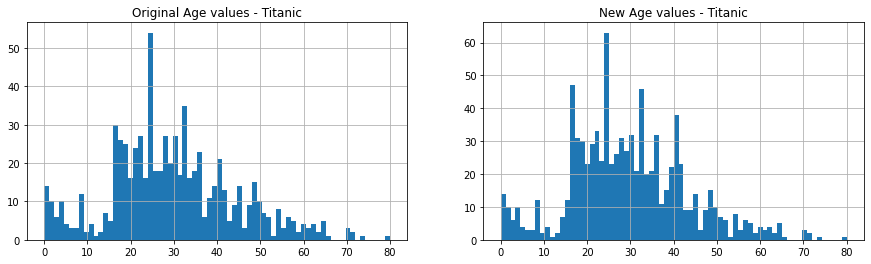

In [241]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.set_title('Original Age values - Titanic')
axis2.set_title('New Age values - Titanic')

average_age_titanic   = titanic_df["Age"].mean()
std_age_titanic       = titanic_df["Age"].std()
count_nan_age_titanic = titanic_df["Age"].isnull().sum()


average_age_test   = test_df["Age"].mean()
std_age_test       = test_df["Age"].std()
count_nan_age_test = test_df["Age"].isnull().sum()

rand_1 = np.random.randint(average_age_titanic - std_age_titanic, average_age_titanic + std_age_titanic, size = count_nan_age_titanic)
rand_2 = np.random.randint(average_age_test - std_age_test, average_age_test + std_age_test, size = count_nan_age_test)

titanic_df['Age'].dropna().astype(int).hist(bins=70, ax=axis1)

titanic_df["Age"][np.isnan(titanic_df["Age"])] = rand_1
test_df["Age"][np.isnan(test_df["Age"])] = rand_2

titanic_df['Age'] = titanic_df['Age'].astype(int)
test_df['Age']    = test_df['Age'].astype(int)

titanic_df['Age'].hist(bins=70, ax=axis2)

<AxesSubplot:xlabel='Age', ylabel='Survived'>

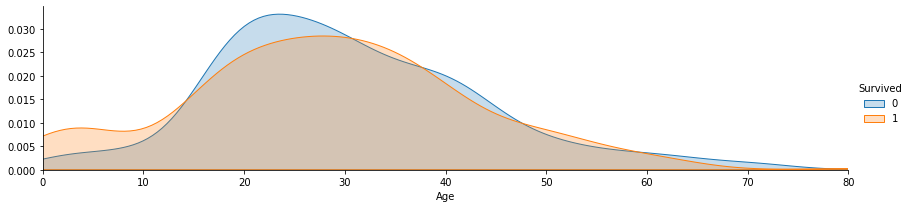

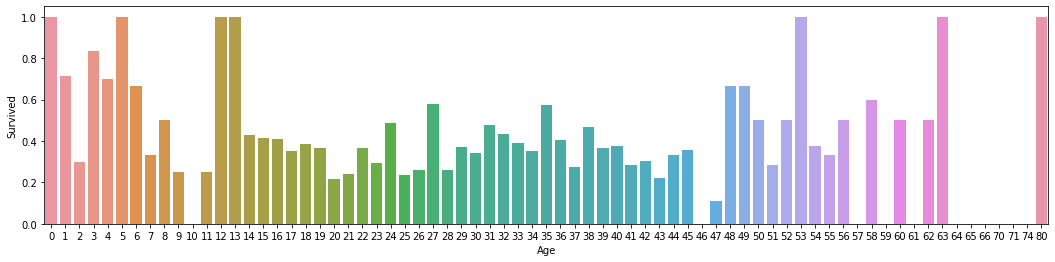

In [242]:
facet = sns.FacetGrid(titanic_df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, titanic_df['Age'].max()))
facet.add_legend()

fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = titanic_df[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age)

In [243]:
titanic_df.drop("Cabin",axis=1,inplace=True)
test_df.drop("Cabin",axis=1,inplace=True)

In [244]:
titanic_df['Family'] =  titanic_df["Parch"] + titanic_df["SibSp"]
titanic_df['Family'].loc[titanic_df['Family'] > 0] = 1
titanic_df['Family'].loc[titanic_df['Family'] == 0] = 0

test_df['Family'] =  test_df["Parch"] + test_df["SibSp"]
test_df['Family'].loc[test_df['Family'] > 0] = 1
test_df['Family'].loc[test_df['Family'] == 0] = 0

titanic_df = titanic_df.drop(['SibSp','Parch'], axis=1)
test_df    = test_df.drop(['SibSp','Parch'], axis=1)

c:\users\kapla\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\users\kapla\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\users\kapla\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: 

[Text(0, 0, 'With Family'), Text(1, 0, 'Alone')]

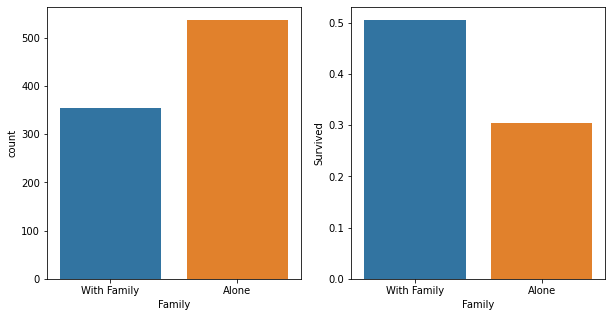

In [245]:
fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,5))

sns.countplot(x='Family', data=titanic_df, order=[1,0], ax=axis1)

family_perc = titanic_df[["Family", "Survived"]].groupby(['Family'],as_index=False).mean()
sns.barplot(x='Family', y='Survived', data=family_perc, order=[1,0], ax=axis2)

axis1.set_xticklabels(["With Family","Alone"], rotation=0)

In [246]:
def get_person(passenger):
    age,sex = passenger
    return 'child' if age < 16 else sex

titanic_df['Person'] = titanic_df[['Age','Sex']].apply(get_person,axis=1)
test_df['Person']    = test_df[['Age','Sex']].apply(get_person,axis=1)

In [247]:
titanic_df.Person.value_counts()

male      531
female    270
child      90
Name: Person, dtype: int64

In [248]:
titanic_df.drop(['Sex'],axis=1,inplace=True)
test_df.drop(['Sex'],axis=1,inplace=True)

In [249]:
titanic_df['Person']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Person, Length: 891, dtype: object

In [250]:
pd.get_dummies(titanic_df['Person']).head()

child  female  male
0      0       0     1
1      0       1     0
2      0       1     0
3      0       1     0
4      0       0     1

In [251]:
person_dummies_titanic  = pd.get_dummies(titanic_df['Person'])
person_dummies_titanic.columns = ['Child','Female','Male']
person_dummies_titanic.drop(['Male'], axis=1, inplace=True)

person_dummies_test  = pd.get_dummies(test_df['Person'])
person_dummies_test.columns = ['Child','Female','Male']
person_dummies_test.drop(['Male'], axis=1, inplace=True)

In [252]:
titanic_df = titanic_df.join(person_dummies_titanic)
test_df    = test_df.join(person_dummies_test)

c:\users\kapla\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\kapla\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\kapla\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


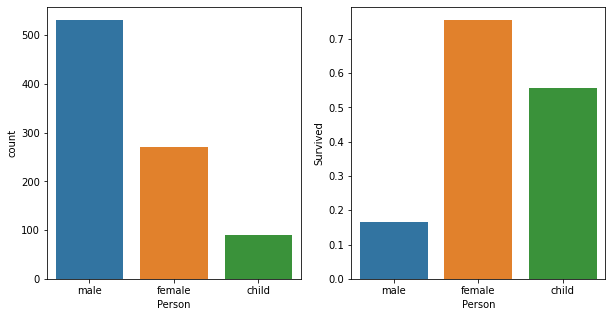

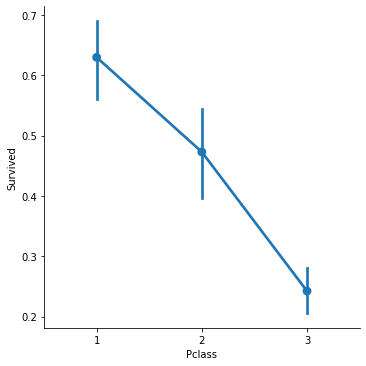

In [253]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))

sns.countplot(x='Person', data=titanic_df, ax=axis1)

person_perc = titanic_df[["Person", "Survived"]].groupby(['Person'],as_index=False).mean()
sns.barplot(x='Person', y='Survived', data=person_perc, ax=axis2, order=['male','female','child'])

titanic_df.drop(['Person'],axis=1,inplace=True)
test_df.drop(['Person'],axis=1,inplace=True)

sns.factorplot('Pclass','Survived',order=[1,2,3], data=titanic_df,size=5)

In [254]:
pclass_dummies_titanic  = pd.get_dummies(titanic_df['Pclass'])
pclass_dummies_titanic.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_titanic.drop(['Class_3'], axis=1, inplace=True)

pclass_dummies_test  = pd.get_dummies(test_df['Pclass'])
pclass_dummies_test.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_test.drop(['Class_3'], axis=1, inplace=True)

titanic_df.drop(['Pclass'],axis=1,inplace=True)
test_df.drop(['Pclass'],axis=1,inplace=True)

titanic_df = titanic_df.join(pclass_dummies_titanic)
test_df    = test_df.join(pclass_dummies_test)

In [255]:
X_train = titanic_df.drop("Survived",axis=1)
y_train = titanic_df["Survived"]
X_test  = test_df.drop("PassengerId",axis=1).copy()
X_test = X_test.drop(['Name', 'Ticket'], axis=1)

In [256]:
X_train1, X_test1, y_train1, y_test1 = model_selection.train_test_split(X_train, y_train, test_size=0.2,random_state=42)

In [257]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [258]:
model_dt = DecisionTreeClassifier()

In [259]:
model_dt.fit(X_train1,y_train1)

DecisionTreeClassifier()

In [260]:
preds = model_dt.predict(X_test1)

In [261]:
from sklearn.metrics import classification_report,plot_confusion_matrix

In [262]:
print(classification_report(y_test1, preds))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       105
           1       0.80      0.82      0.81        74

    accuracy                           0.84       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.84      0.84      0.84       179



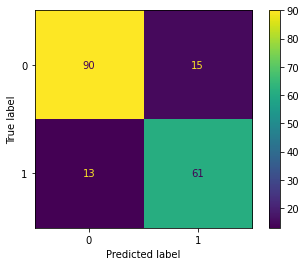

In [263]:
plot_confusion_matrix(model_dt,X_test1, y_test1)

In [264]:
pd.DataFrame(index=X_train.columns, data=model_dt.feature_importances_, columns= ['Feature Importance']).sort_values('Feature Importance')

Feature Importance
Child              0.006035
Q                  0.010142
C                  0.017460
Family             0.018539
Class_1            0.056342
Class_2            0.084333
Fare               0.211004
Female             0.283578
Age                0.312569

In [265]:
from sklearn.tree import plot_tree

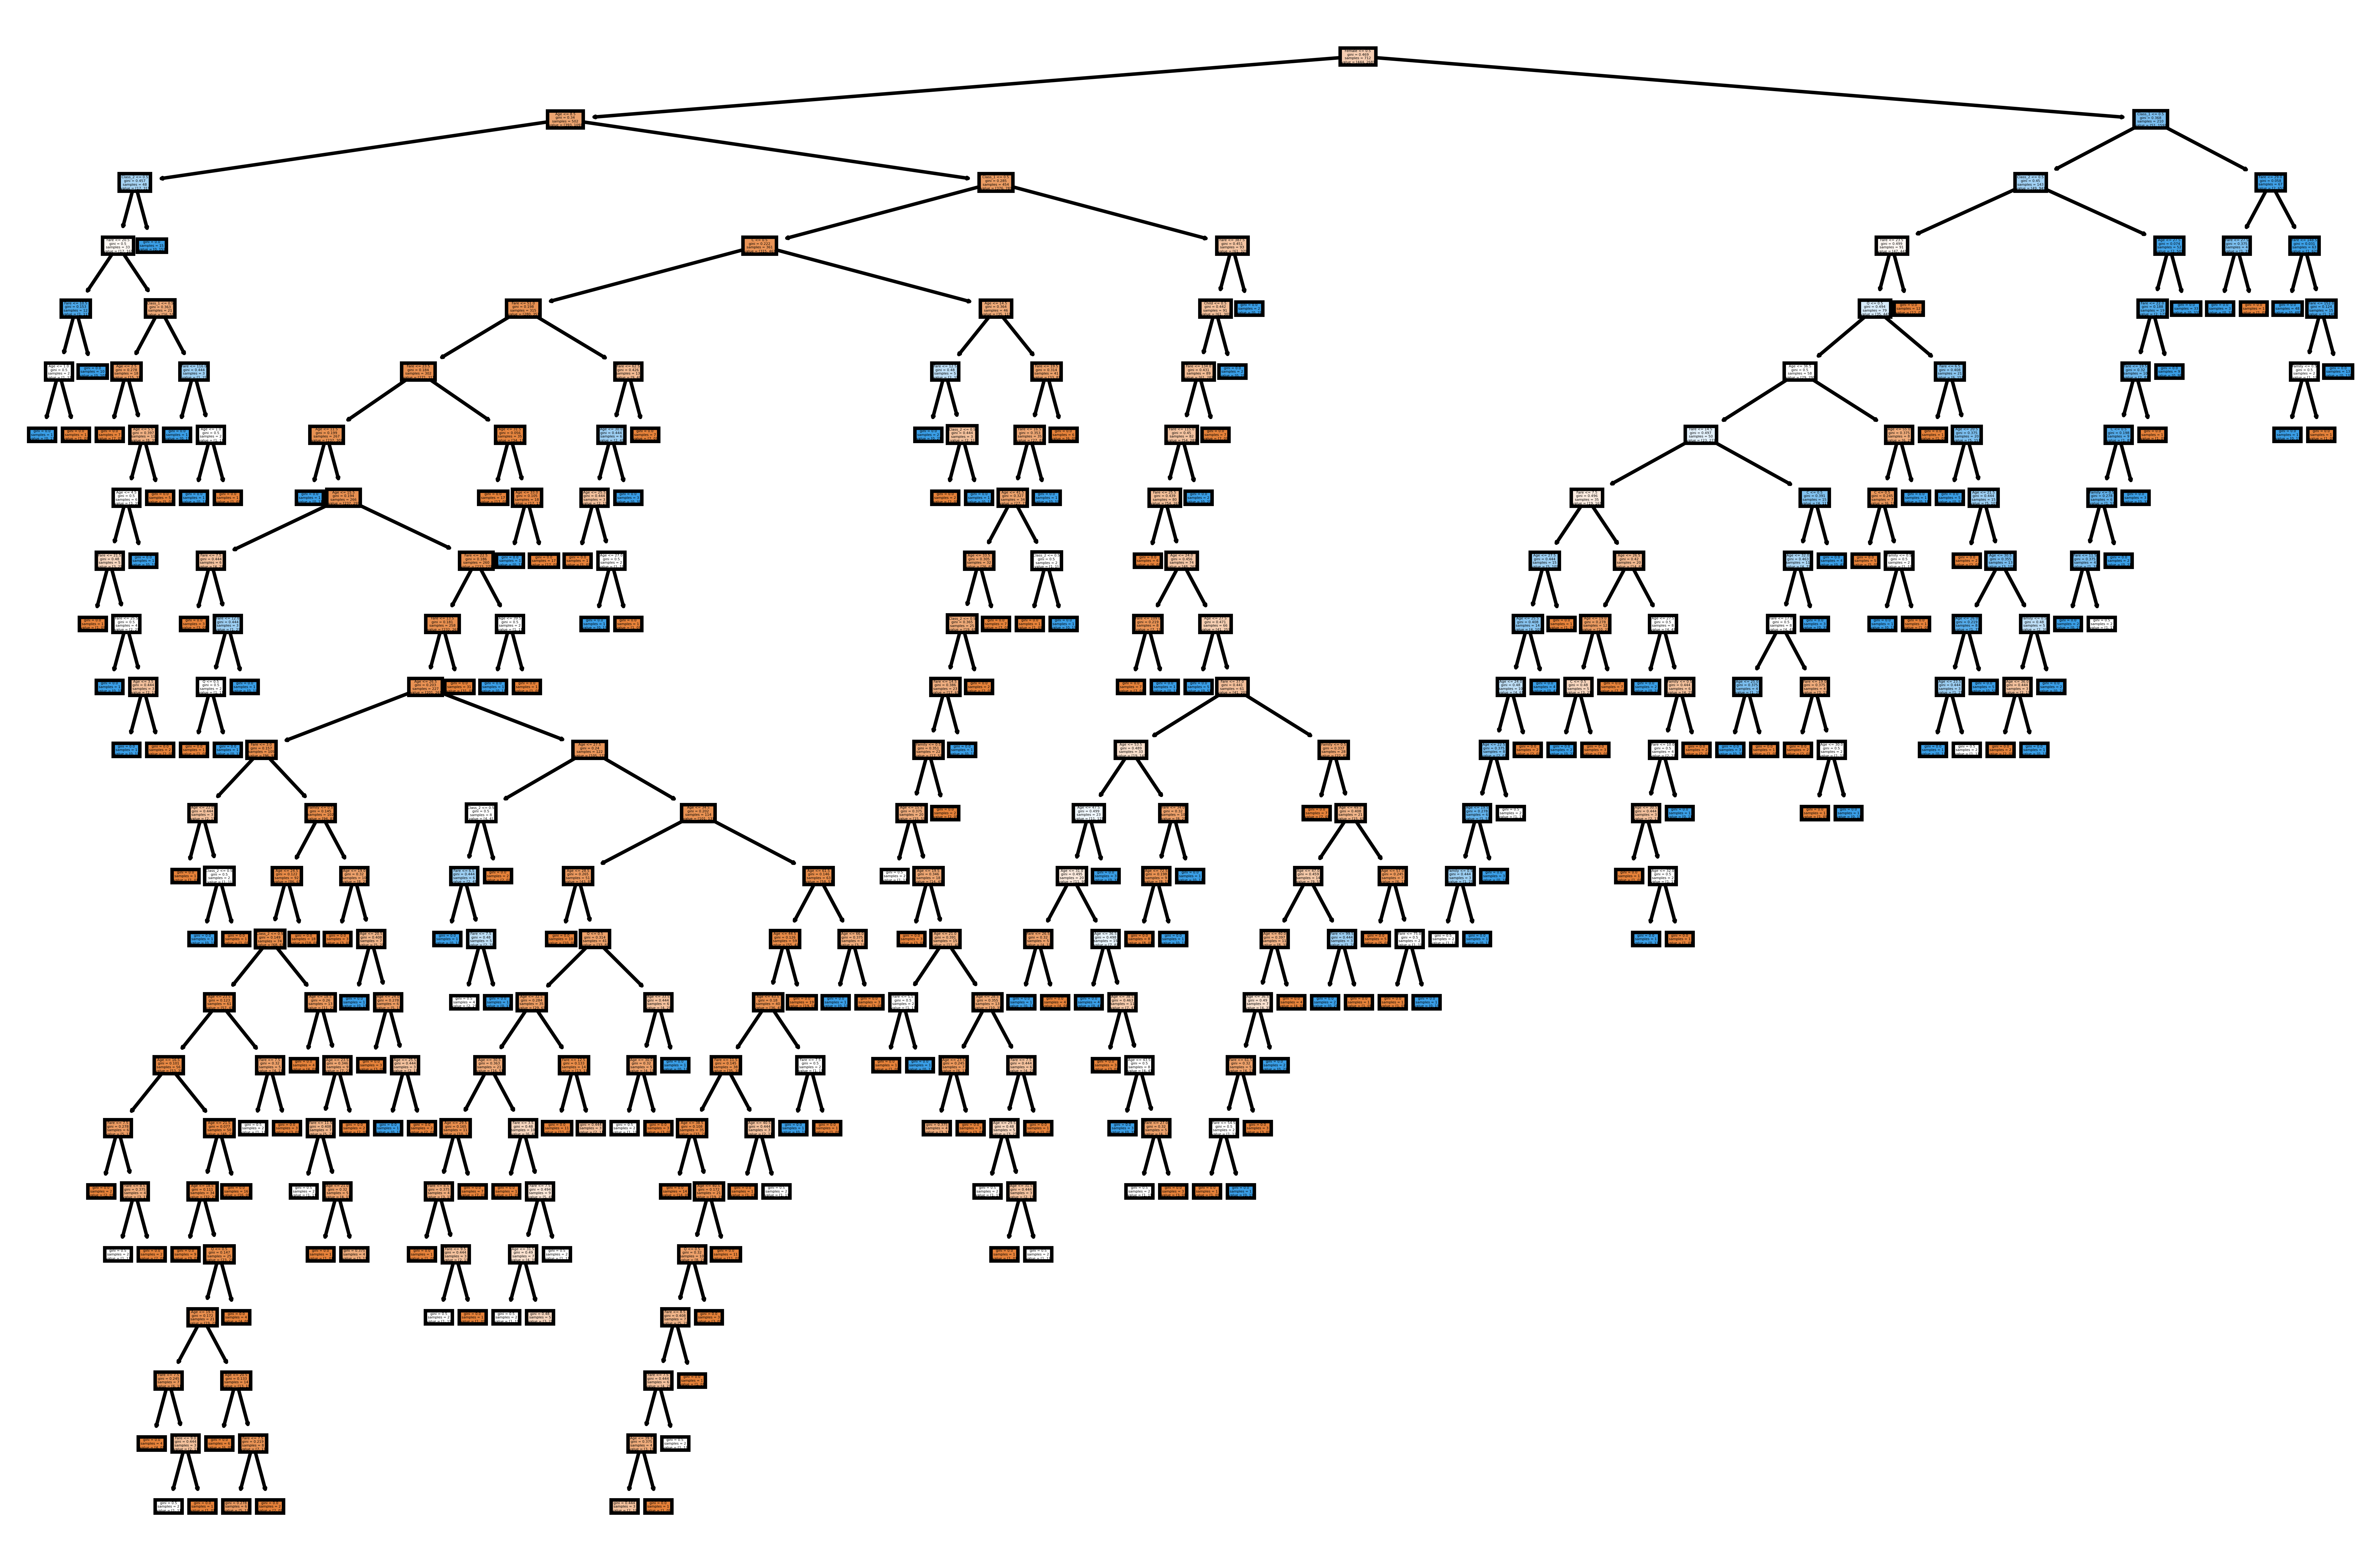

In [266]:
plt.figure(figsize=(12,8),dpi=800)
plot_tree(model_dt,feature_names=X_train.columns, filled=True);

In [267]:
def report(model_dt):
    dtpreds = model_dt.predict(X_test1)
    print(classification_report(y_test1, dtpreds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=800)
    plot_tree(model_dt,feature_names=X_train.columns, filled=True);

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       105
           1       0.80      0.82      0.81        74

    accuracy                           0.84       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.84      0.84      0.84       179





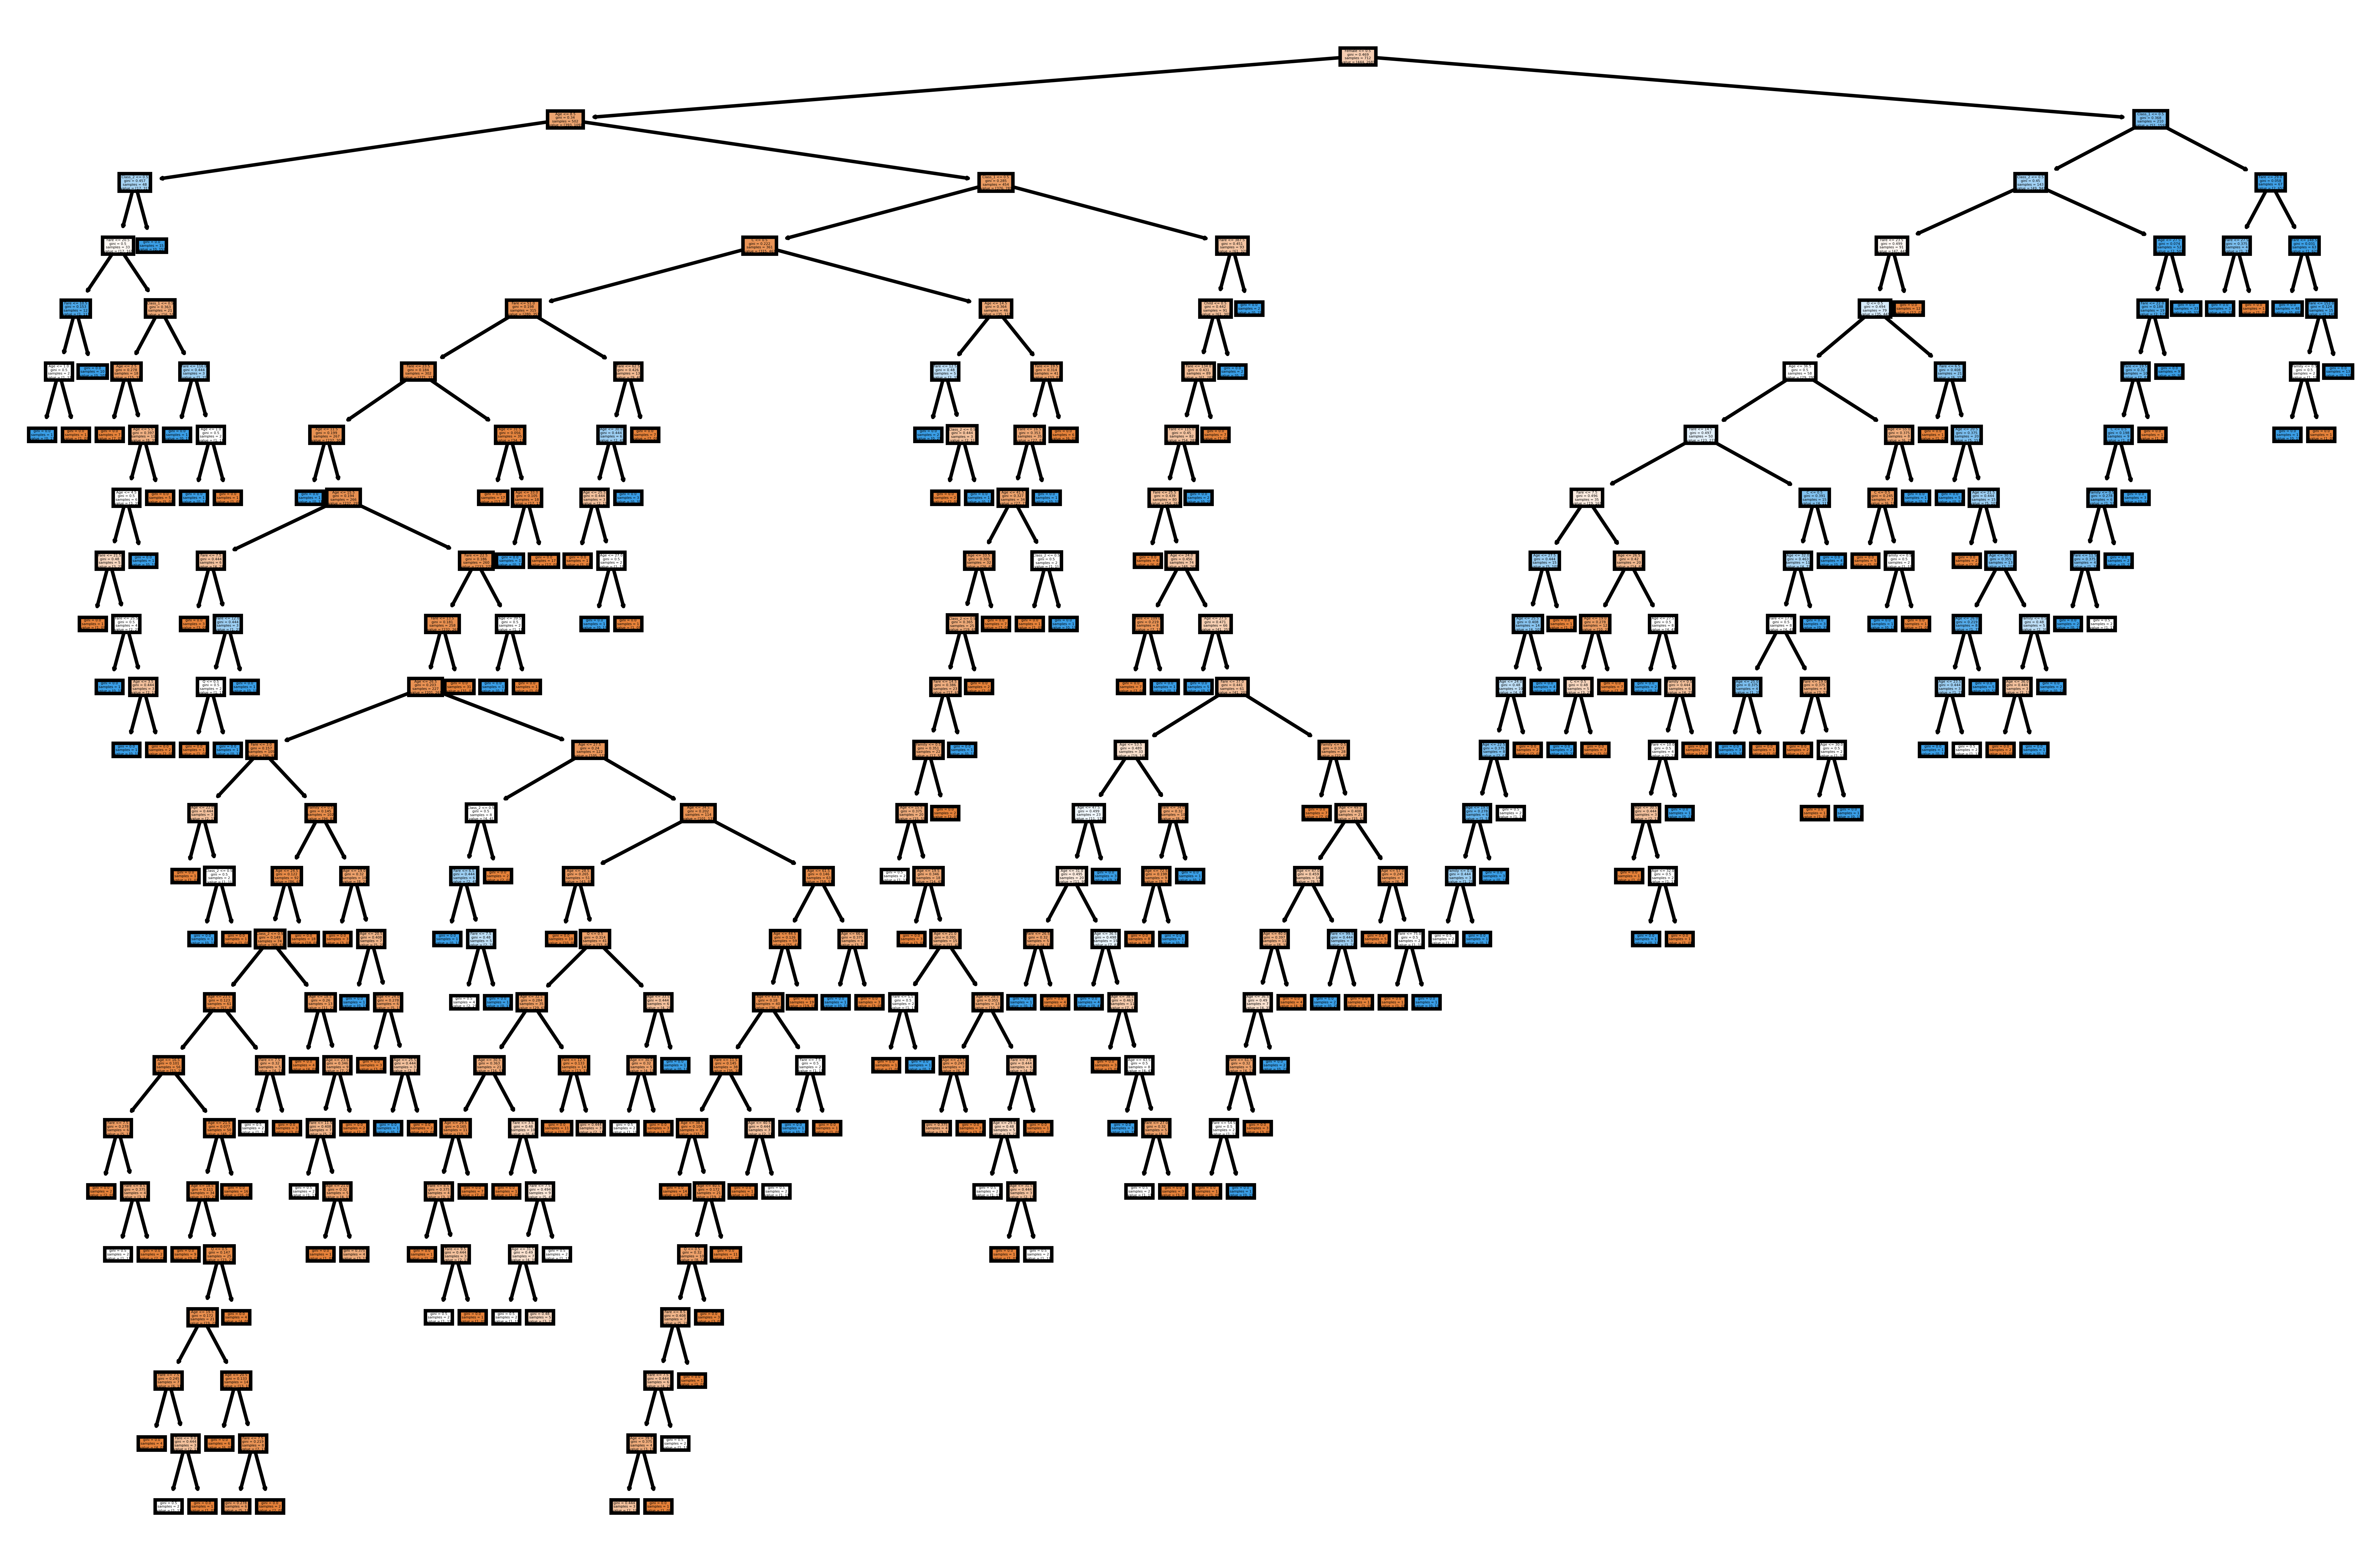

In [268]:
report(model_dt)

In [269]:
pruned = DecisionTreeClassifier(max_depth=3)

In [270]:
pruned.fit(X_train1,y_train1)

DecisionTreeClassifier(max_depth=3)

              precision    recall  f1-score   support

           0       0.73      0.96      0.83       105
           1       0.90      0.49      0.63        74

    accuracy                           0.77       179
   macro avg       0.81      0.72      0.73       179
weighted avg       0.80      0.77      0.75       179





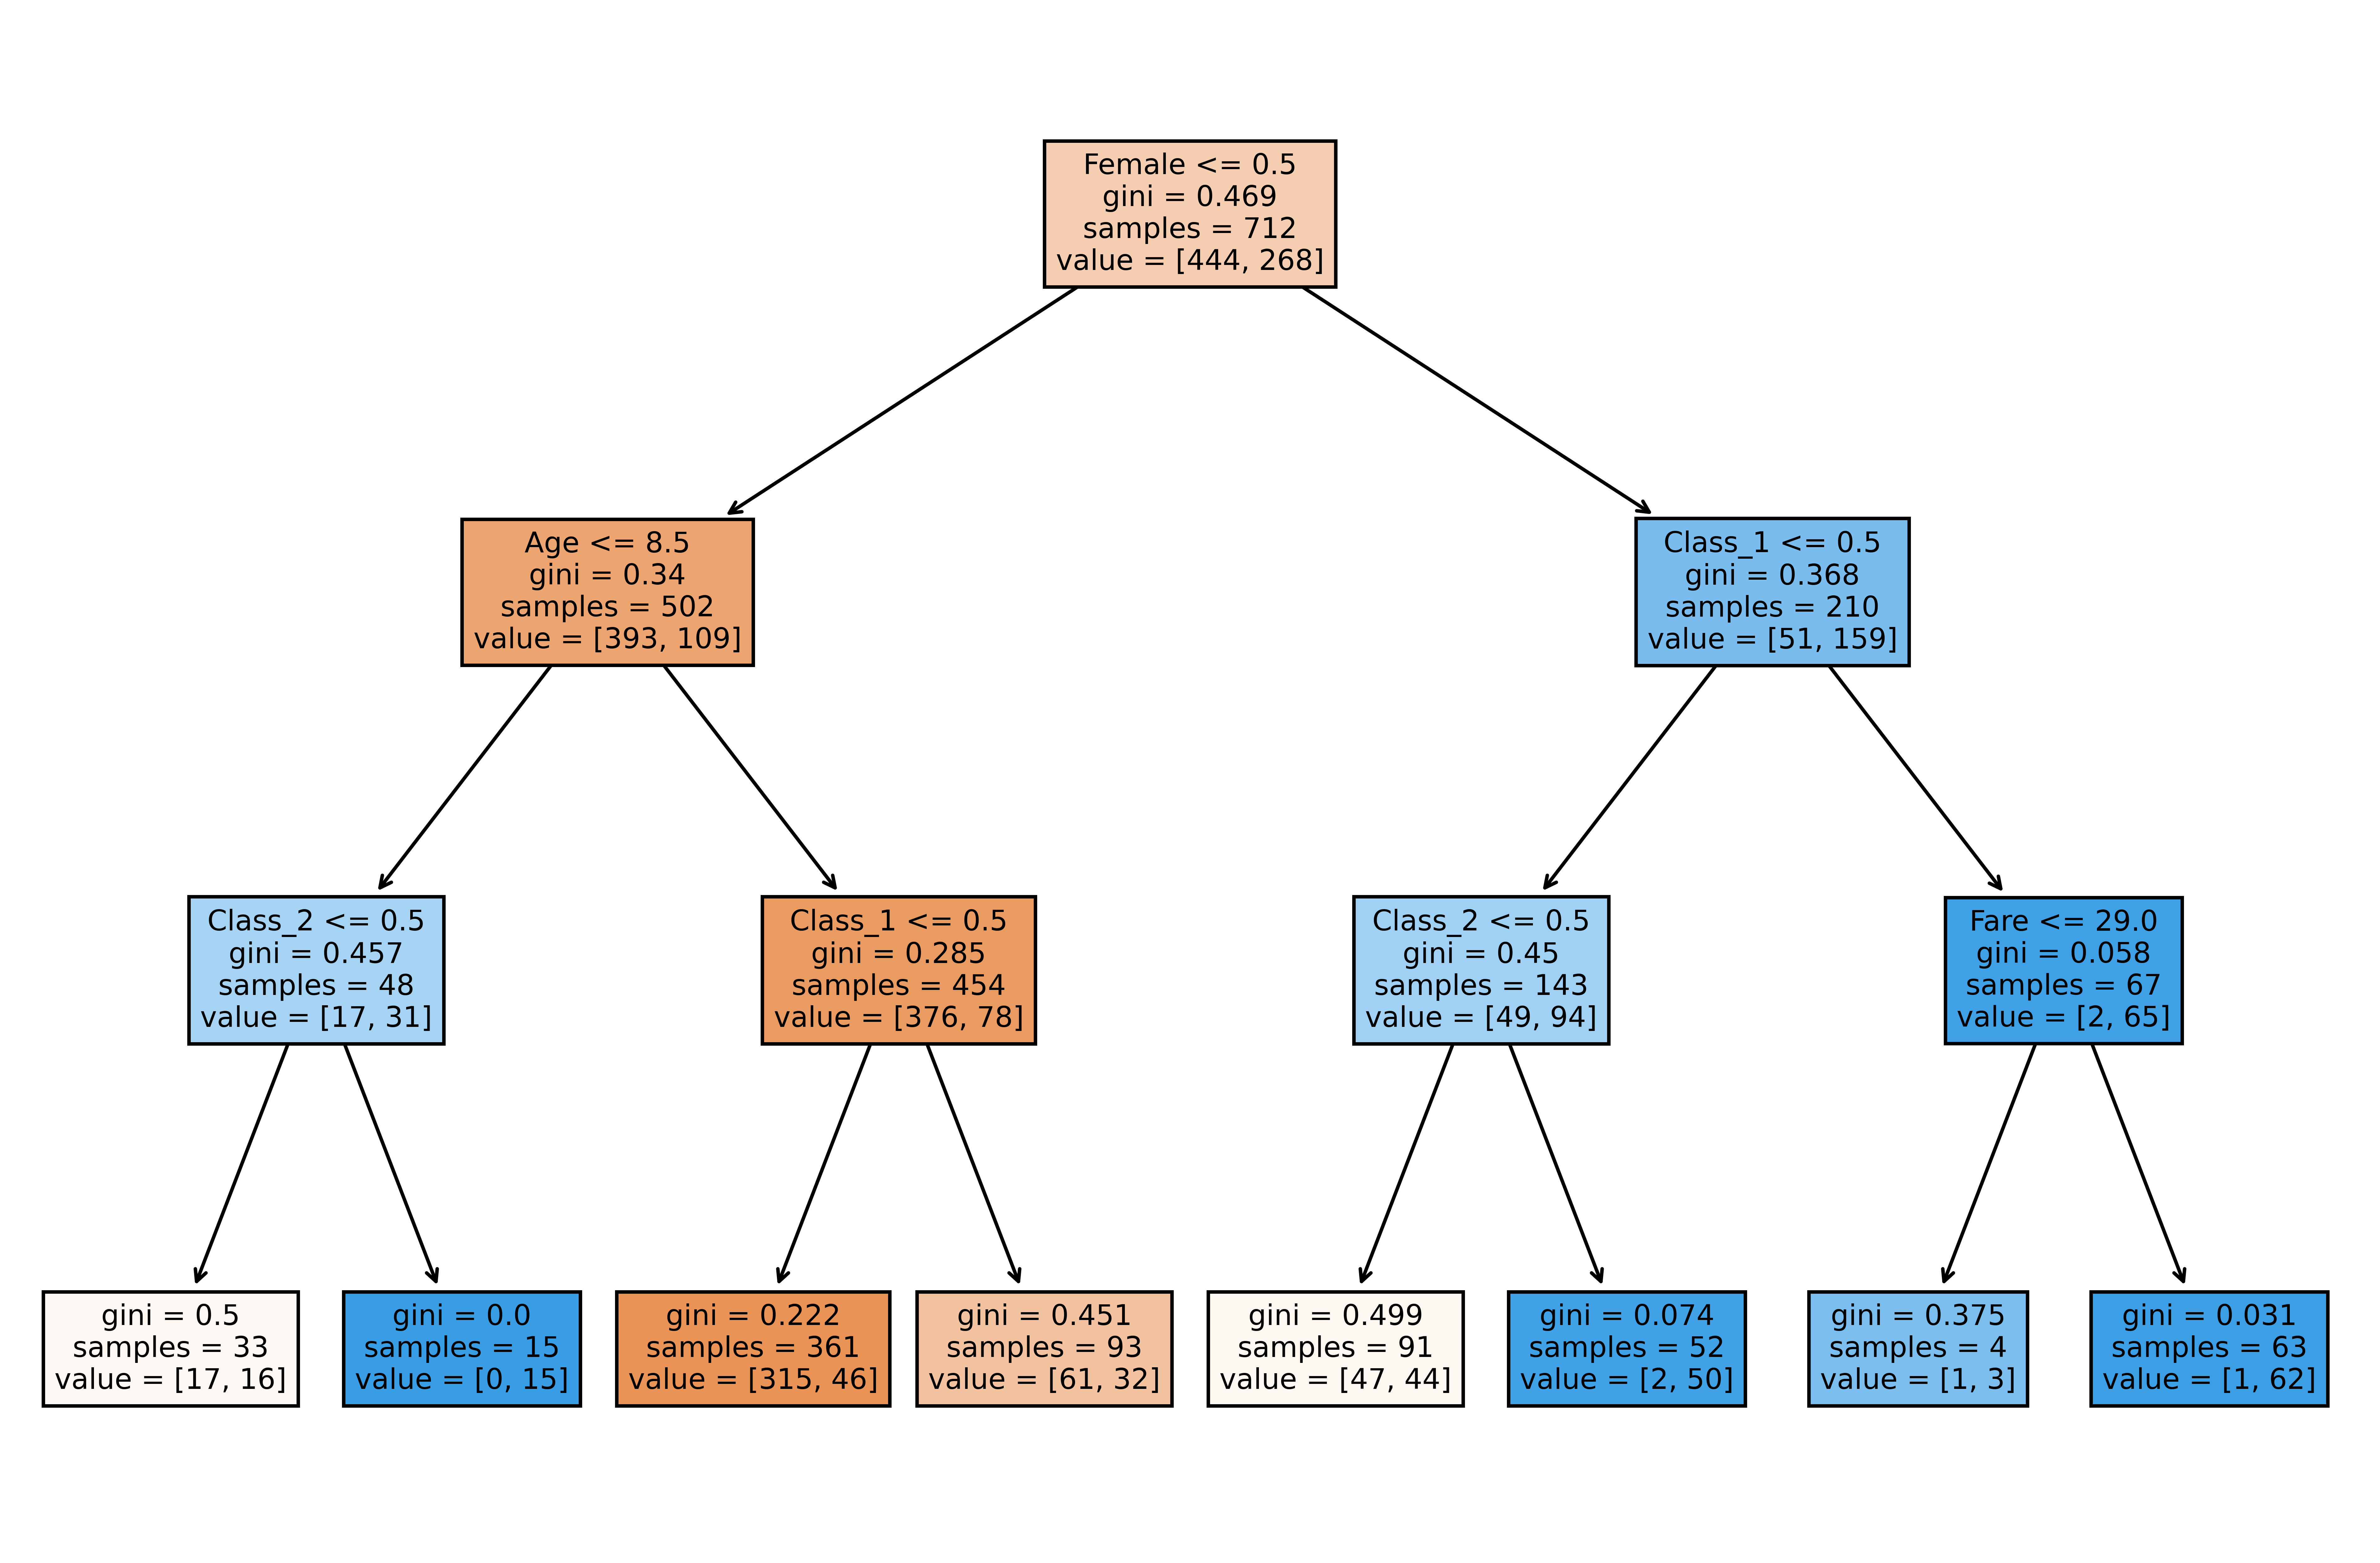

In [271]:
report(pruned)

In [272]:
max_leaf = DecisionTreeClassifier(max_leaf_nodes=5)

In [273]:
max_leaf.fit(X_train1, y_train1)

DecisionTreeClassifier(max_leaf_nodes=5)

              precision    recall  f1-score   support

           0       0.74      0.95      0.83       105
           1       0.89      0.53      0.66        74

    accuracy                           0.78       179
   macro avg       0.81      0.74      0.75       179
weighted avg       0.80      0.78      0.76       179





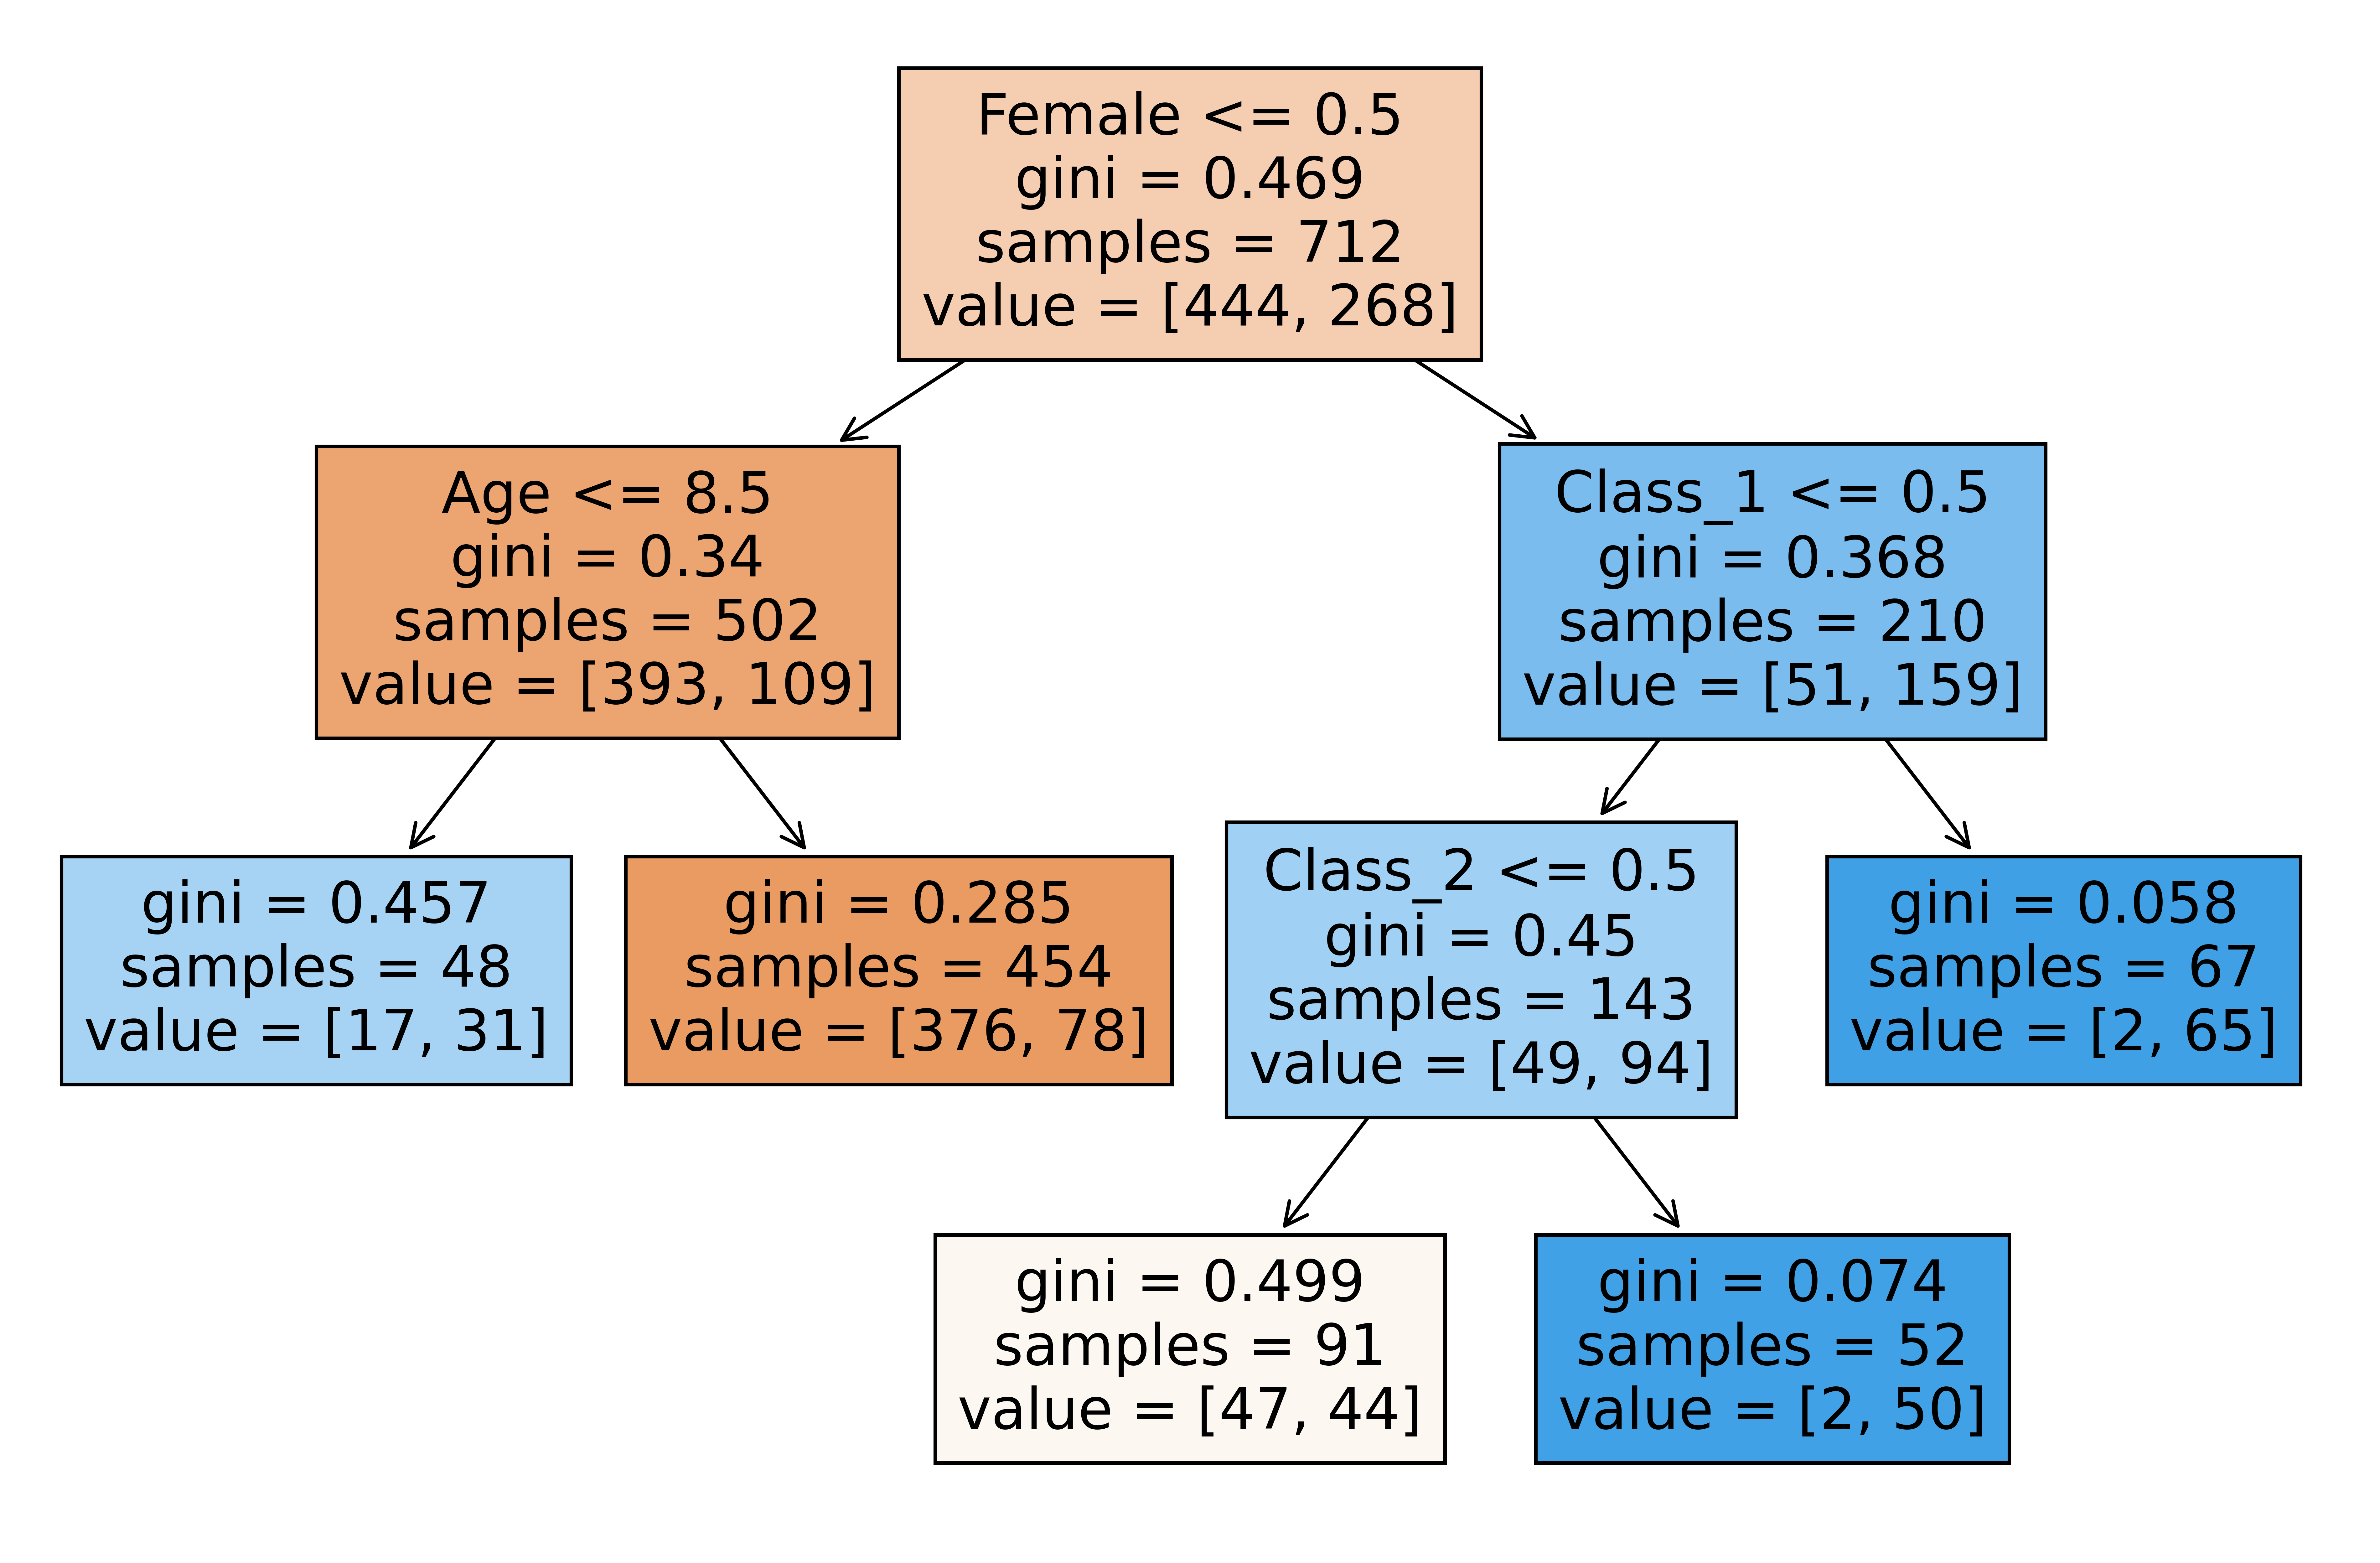

In [274]:
report(max_leaf)

In [275]:
entropy = DecisionTreeClassifier(criterion='entropy')

In [276]:
entropy.fit(X_train1, y_train1)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       105
           1       0.76      0.77      0.77        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179





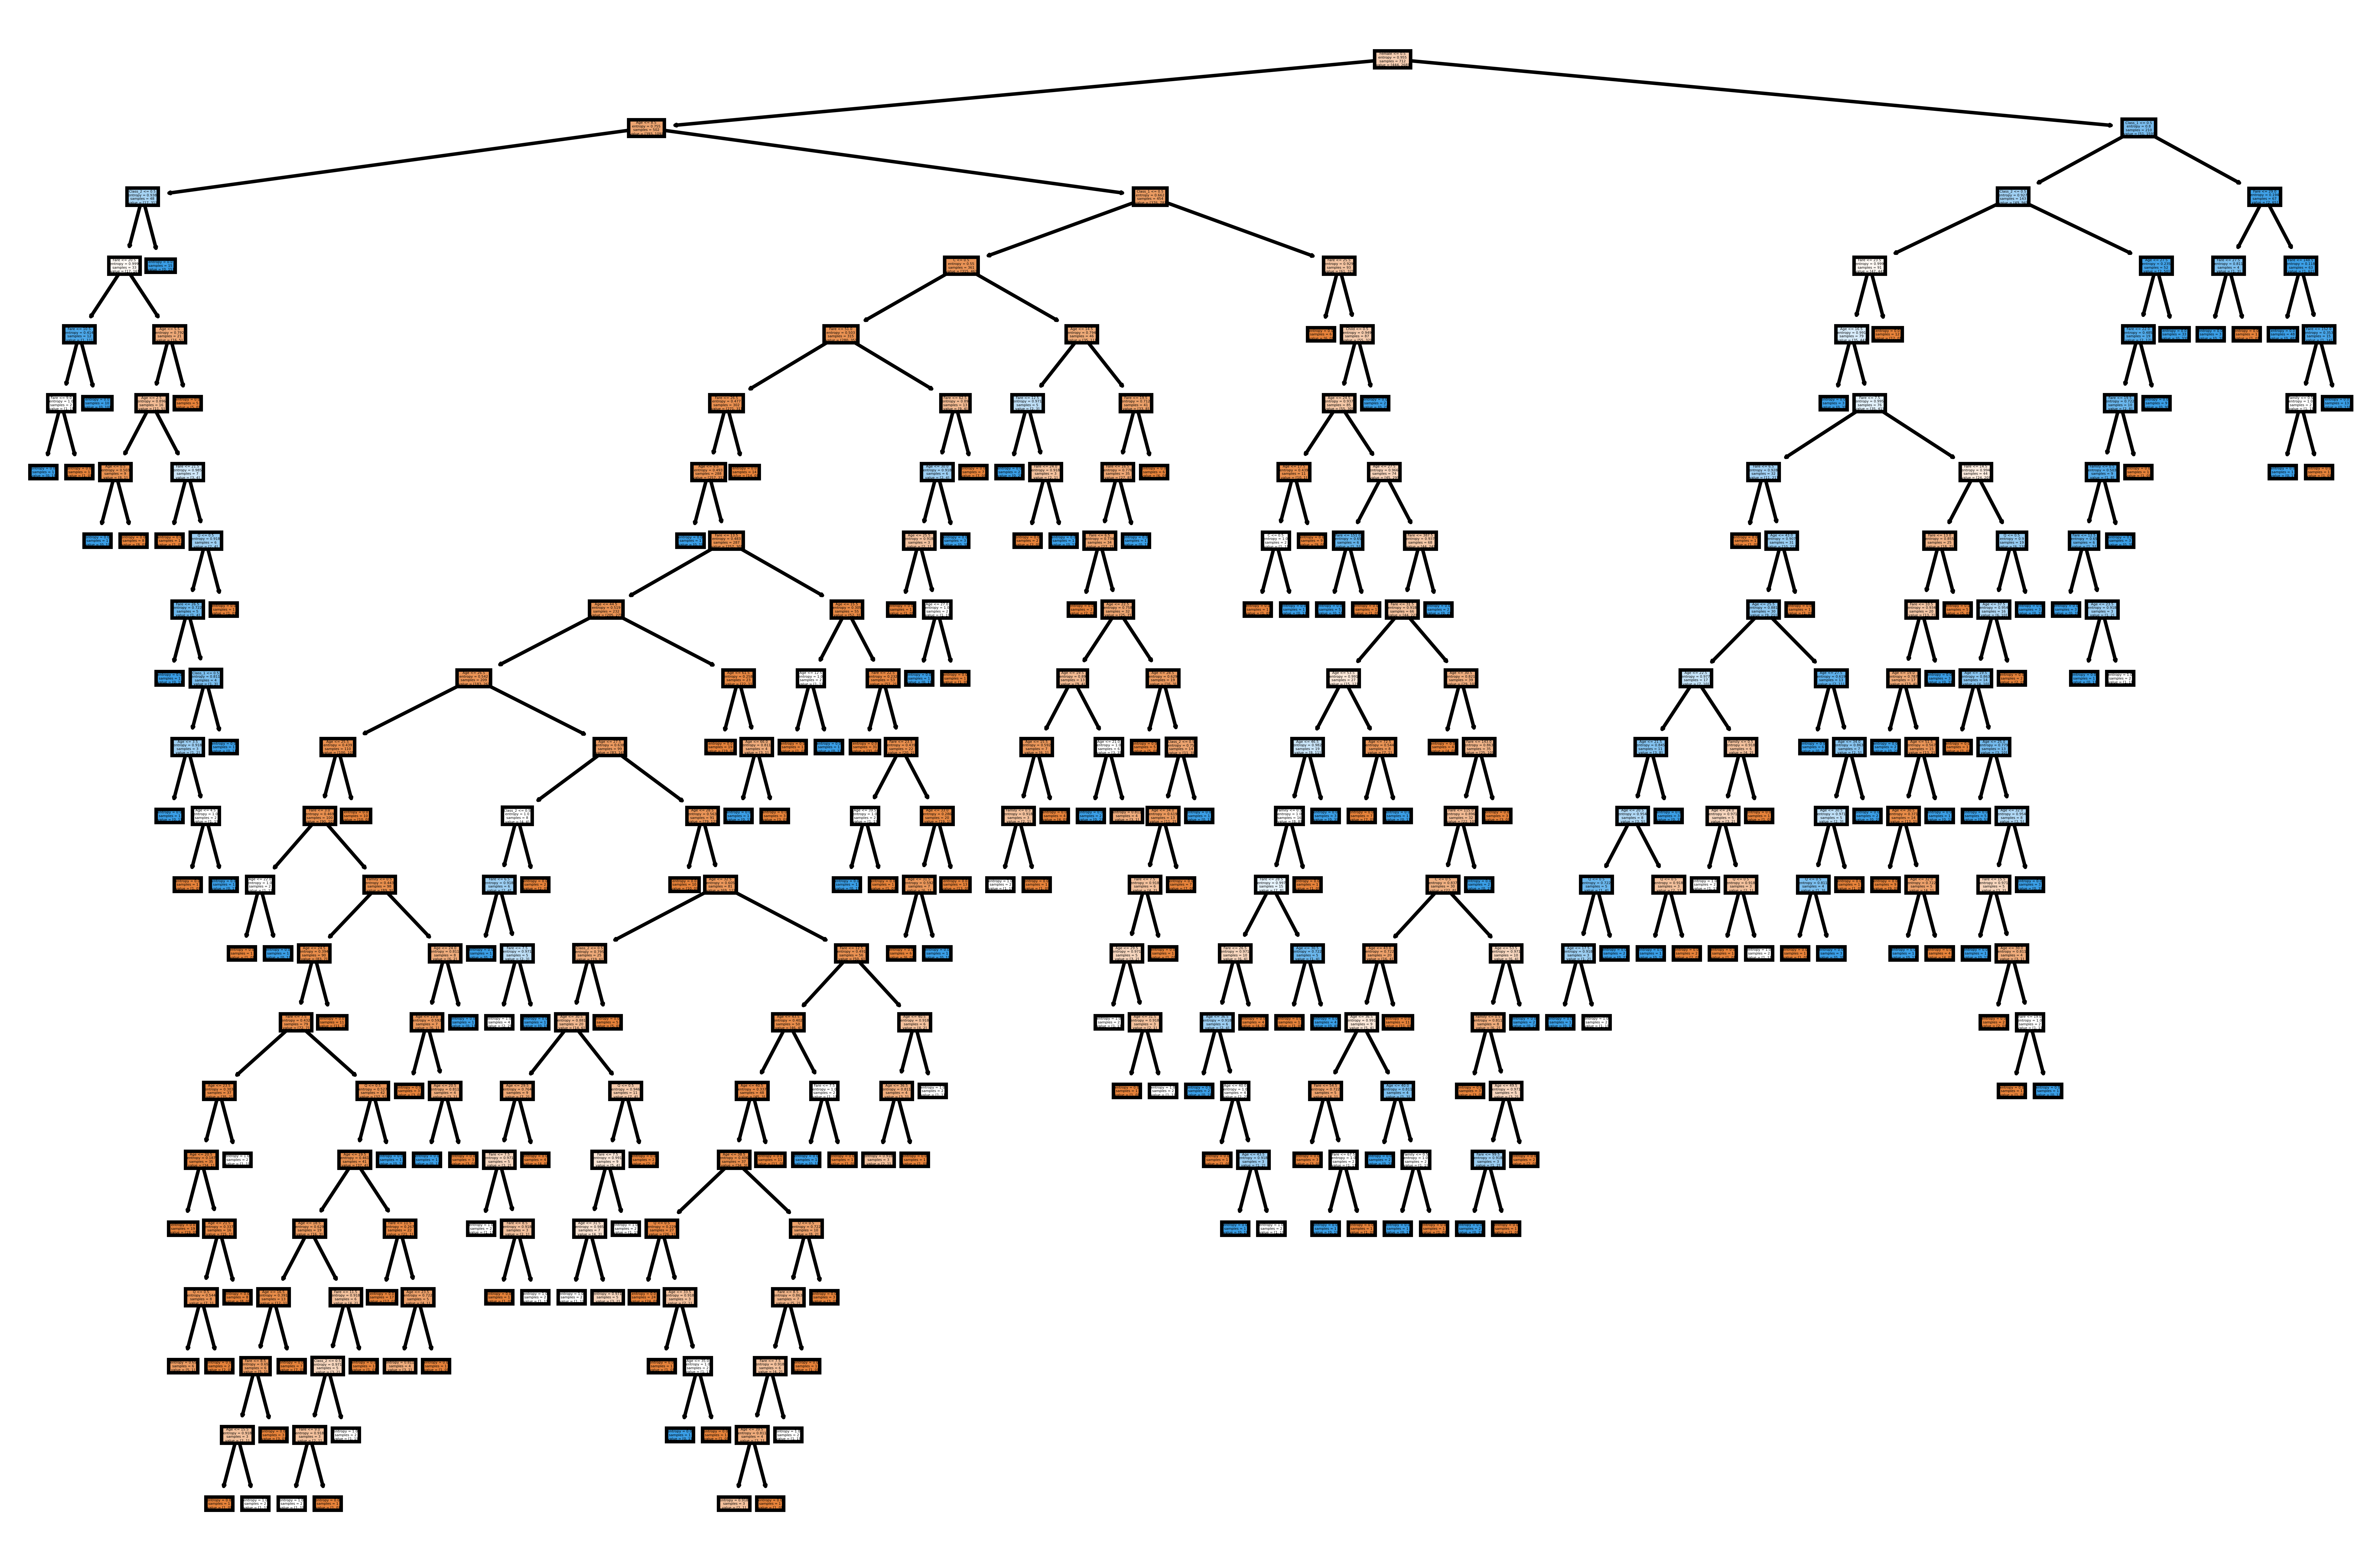

In [277]:
report(entropy)

In [278]:
from sklearn.model_selection import GridSearchCV

In [279]:
parameters = {"criterion":['gini','entropy'],
              "max_depth": range(3,20),
              "min_samples_leaf":range(3,20)
             }

In [280]:
grid_dt = GridSearchCV(estimator=model_dt,
                       param_grid= parameters,
                       cv=3,return_train_score=True,
                       n_jobs= -1
                      )

In [281]:
grid_dt.fit(X_train1, y_train1)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 20),
                         'min_samples_leaf': range(3, 20)},
             return_train_score=True)

In [282]:
df = pd.DataFrame(grid_dt.cv_results_)

<AxesSubplot:xlabel='param_min_samples_leaf', ylabel='param_max_depth'>

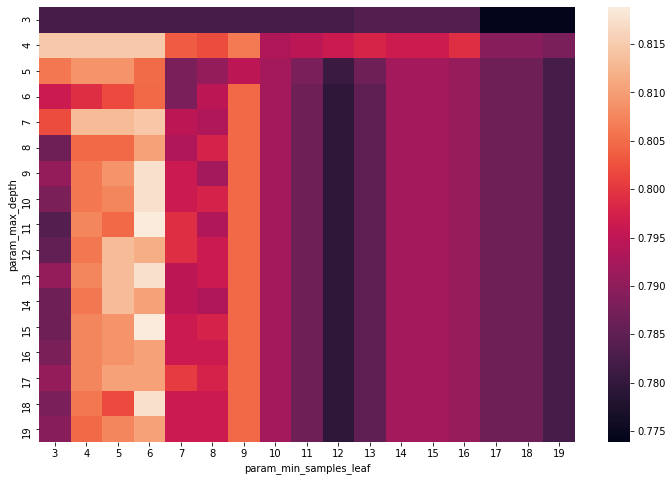

In [283]:
plt.figure(figsize=(12,8))
sns.heatmap(data=df[df['param_criterion'] == 'gini'].pivot_table(index='param_max_depth',columns= 'param_min_samples_leaf', values='mean_test_score'))

In [284]:
df[df['param_criterion'] == 'gini'].pivot_table(index='param_max_depth',columns= 'param_min_samples_leaf', values='mean_test_score')

param_min_samples_leaf        3         4         5         6         7   \
param_max_depth                                                            
3                       0.782304  0.782304  0.782304  0.782304  0.782304   
4                       0.814630  0.814630  0.814630  0.814630  0.803378   
5                       0.806173  0.808992  0.808992  0.804790  0.787913   
6                       0.796310  0.799147  0.801954  0.804755  0.787907   
7                       0.801977  0.813200  0.813194  0.814600  0.794945   
8                       0.786500  0.804767  0.804761  0.810393  0.793527   
9                       0.790726  0.806167  0.808992  0.817425  0.796328   
10                      0.787930  0.806167  0.807580  0.817425  0.796328   
11                      0.783717  0.807568  0.804767  0.818825  0.799147   
12                      0.785117  0.806167  0.813205  0.811793  0.799147   
13                      0.790731  0.807568  0.813211  0.817425  0.794927   
14                      0.786518  0.806167  0.813211  0.810393  0.794927   
15                      0.786512  0.807568  0.808992  0.818825  0.796328   
16                      0.787930  0.807568  0.808992  0.810393  0.796328   
17                      0.790731  0.807568  0.810393  0.810393  0.800547   
18                      0.787919  0.806167  0.801960  0.817425  0.796328   
19                      0.789319  0.804767  0.807580  0.810393  0.796328   

param_min_samples_leaf        8         9         10        11        12  \
param_max_depth                                                            
3                       0.782304  0.782304  0.782304  0.782304  0.782304   
4                       0.801971  0.806191  0.793533  0.794933  0.796340   
5                       0.790708  0.794927  0.792108  0.787907  0.780874   
6                       0.794921  0.804755  0.792091  0.786488  0.779456   
7                       0.793503  0.804755  0.792091  0.786488  0.779456   
8                       0.797722  0.804755  0.792091  0.786488  0.779456   
9                       0.792102  0.804755  0.792091  0.786488  0.779456   
10                      0.797722  0.804755  0.792091  0.786488  0.779456   
11                      0.793503  0.804755  0.792091  0.786488  0.779456   
12                      0.796322  0.804755  0.792091  0.786488  0.779456   
13                      0.796322  0.804755  0.792091  0.786488  0.779456   
14                      0.793503  0.804755  0.792091  0.786488  0.779456   
15                      0.797722  0.804755  0.792091  0.786488  0.779456   
16                      0.796322  0.804755  0.792091  0.786488  0.779456   
17                      0.797722  0.804755  0.792091  0.786488  0.779456   
18                      0.796322  0.804755  0.792091  0.786488  0.779456   
19                      0.796322  0.804755  0.792091  0.786488  0.779456   

param_min_samples_leaf        13        14        15        16        17  \
param_max_depth                                                            
3                       0.783723  0.783723  0.783723  0.783723  0.773877   
4                       0.797758  0.796351  0.796351  0.799153  0.789307   
5                       0.786512  0.792138  0.792138  0.790737  0.786494   
6                       0.785094  0.792138  0.792138  0.790737  0.786494   
7                       0.785094  0.792138  0.792138  0.790737  0.786494   
8                       0.785094  0.792138  0.792138  0.790737  0.786494   
9                       0.785094  0.792138  0.792138  0.790737  0.786494   
10                      0.785094  0.792138  0.792138  0.790737  0.786494   
11                      0.785094  0.792138  0.792138  0.790737  0.786494   
12                      0.785094  0.792138  0.792138  0.790737  0.786494   
13                      0.785094  0.792138  0.792138  0.790737  0.786494   
14                      0.785094  0.792138  0.792138  0.790737  0.786494   
15                      0.785094  0.792138  0.

In [285]:
grid_dt.best_params_

{'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 7}

In [286]:
grid_dt.best_score_

0.8202318902244442

In [287]:
predsdt =grid_dt.best_estimator_.predict(X_test1)

In [288]:
print(classification_report(y_test1,predsdt))

              precision    recall  f1-score   support

           0       0.80      0.90      0.84       105
           1       0.82      0.68      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.80      0.80       179



In [289]:
from sklearn.metrics import plot_confusion_matrix

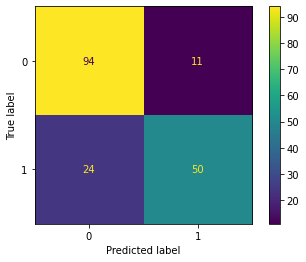

In [290]:
plot_confusion_matrix(grid_dt.best_estimator_,X_test1,y_test1)

In [291]:
print(classification_report(y_test1,predsdt))

              precision    recall  f1-score   support

           0       0.80      0.90      0.84       105
           1       0.82      0.68      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.80      0.80       179



In [292]:
predsdt_X_test =grid_dt.best_estimator_.predict(X_test)

In [297]:
predsdt_X_test

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [142]:
# Random Forests
model_rf = RandomForestClassifier()

In [143]:
model_rf.fit(X_train1,y_train1)

RandomForestClassifier()

In [144]:
rf_preds = model_rf.predict(X_test1)

In [145]:
print(classification_report(y_test1,rf_preds))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [152]:
parameters = {"criterion":['gini','entropy'],
              "max_depth": range(1,20),
              "min_samples_leaf":range(1,20)
             }

In [153]:
grid_rf = GridSearchCV(estimator=model_rf,
                       param_grid= parameters,
                       cv=3,return_train_score=True,
                       n_jobs= -1
                      )

In [154]:
grid_rf.fit(X_train1,y_train1)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 20),
                         'min_samples_leaf': range(1, 20)},
             return_train_score=True)

In [155]:
grid_rf.best_score_

0.8174189507026438

In [156]:
grid_rf.best_params_

{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 1}

In [158]:
predsrf = grid_rf.best_estimator_.predict(X_test1)

In [159]:
print(classification_report(y_test1,predsrf))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



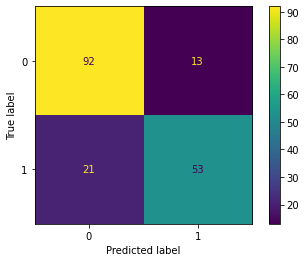

In [298]:
plot_confusion_matrix(grid_rf.best_estimator_,X_test1,y_test1)